In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt



In [2]:
# قراءة الملف
file_path = 'Salary Data.csv'
df = pd.read_csv(file_path)


In [3]:

# عرض العشر صفوف الأولى للتأكد من البيانات
print(df.head(10))

# عرض معلومات عن البيانات
print(df.info())

# عرض بعض الإحصائيات الأساسية
print(df.describe())

# عرض أسماء الأعمدة
print(df.columns)




    Age  Gender Education Level              Job Title  Years of Experience  \
0  32.0    Male      Bachelor's      Software Engineer                  5.0   
1  28.0  Female        Master's           Data Analyst                  3.0   
2  45.0    Male             PhD         Senior Manager                 15.0   
3  36.0  Female      Bachelor's        Sales Associate                  7.0   
4  52.0    Male        Master's               Director                 20.0   
5  29.0    Male      Bachelor's      Marketing Analyst                  2.0   
6  42.0  Female        Master's        Product Manager                 12.0   
7  31.0    Male      Bachelor's          Sales Manager                  4.0   
8  26.0  Female      Bachelor's  Marketing Coordinator                  1.0   
9  38.0    Male             PhD       Senior Scientist                 10.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  
5   55000.0  
6  120000.0  
7   80000.0  
8   

In [19]:
# معالجة القيم المفقودة
df.dropna(inplace=True)



In [20]:
# استخراج الميزة (YearsExperience) والهدف (Salary)
X = df[['Years of Experience']].values  # تأكد من تحويلها إلى مصفوفة ثنائية الأبعاد
y = df['Salary'].values



In [21]:
# تقسيم البيانات إلى تدريب واختبار (80% تدريب، 20% اختبار)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# تدريب النموذج
regr = LinearRegression()
regr.fit(X_train, y_train)



LinearRegression()

In [23]:
# إجراء التنبؤات
y_pred = regr.predict(X_test)



In [24]:
# عرض النتائج
print("Coefficients: \n", regr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))


Coefficients: 
 [6822.59017499]
Mean squared error: 241834883.90
Coefficient of determination: 0.90


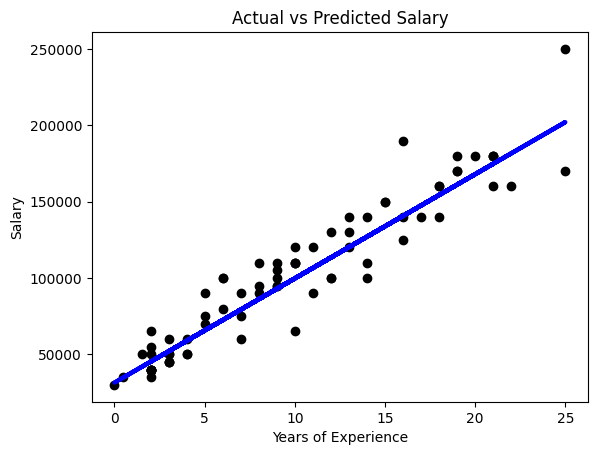

In [25]:

# رسم النتائج
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Actual vs Predicted Salary")
plt.show()